In [17]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

In [18]:
#load inbuilt dataset
data=sns.load_dataset('titanic')
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [20]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Handling null values

In [21]:
titanic=data.drop(columns='deck')
titanic['age']=titanic['age'].fillna(titanic['age'].mean())

In [22]:
titanic['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
titanic['embarked'].value_counts

<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object>

In [24]:
titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [25]:
titanic['embark_town'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object>

In [26]:
titanic = pd.get_dummies(titanic, columns=['embarked','embark_town'])

In [27]:
titanic.isnull().sum()

survived                   0
pclass                     0
sex                        0
age                        0
sibsp                      0
parch                      0
fare                       0
class                      0
who                        0
adult_male                 0
alive                      0
alone                      0
embarked_C                 0
embarked_Q                 0
embarked_S                 0
embark_town_Cherbourg      0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

Box Plot for survived people

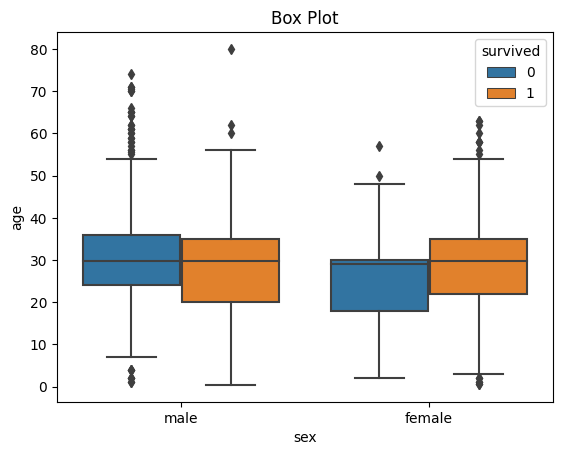

In [29]:
sns.boxplot(data=titanic, x='sex', y='age', hue='survived')
plt.title("Box Plot")
plt.show()


# Observations

1. We created a box plot of variables 'age & 'sex' & used survival as the hue
2. There we visualized three variables Age, Sex & Survival. Two out of these are categorical and one is numerical
3. Now in addition to the information about the age of each gender, you can also see the distribution of passengers who survived
4. For instance, you can see that among the male passengers, on average more younger people survived as compared to older ones
